In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.datasets import make_blobs

sns.set_style("darkgrid")

In [2]:
# Sample data size of 50
X, y = make_blobs(n_samples=52, centers=2, random_state=0, cluster_std=0.60)

# Using Linear Kernel in SVM
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [3]:
# Plot SVC Decision Function
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = model.decision_function(xy).reshape(X.shape)
    
    # Plot Decision Boundary & Margins
    ax.contour(X, Y, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot Support Vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Title, Grid, Legend
    label='Support Vector Machine Algorithm'
    ax.set_title(label, fontsize=14)
    ax.grid(True)

    plt.show()

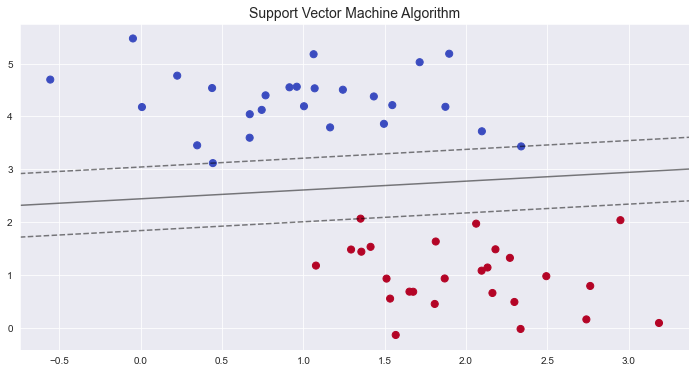

In [4]:
# Plot the vectors from the sample dataset
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

# Call Plot SVC Decision Function
plot_svc_decision_function(model);

In [5]:
# Print variables regarding the hyperplane
print('Support vectors = ', model.support_vectors_)
print('w = ',model.coef_)
print('b = ',model.intercept_)

Support vectors =  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]
w =  [[ 0.2775921 -1.662433 ]]
b =  [4.05558375]


In [6]:
print('w = ',model.coef_)
print('b = ',model.intercept_)
print('Indices of support vectors = ', model.support_)
print('Support vectors = ', model.support_vectors_)
print('Number of support vectors for each class = ', model.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(model.dual_coef_))

w =  [[ 0.2775921 -1.662433 ]]
b =  [4.05558375]
Indices of support vectors =  [20 32  6]
Support vectors =  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]
Number of support vectors for each class =  [2 1]
Coefficients of the support vector in the decision function =  [[0.88641095 0.53417604 1.42058699]]
